# Embedding Workflow

In [4]:
import openai
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

In [7]:
# client = openai.AsyncOpenAI()

def openai_client():
    load_dotenv()
    return openai.AsyncOpenAI(api_key=os.getenv('OPENAI_APIKEY'))
    
def ollama_client():
    return openai.AsyncOpenAI(
        base_url='http://192.168.10.35:11434/v1',
        api_key='ollama'
    )

local = False

if local:
    client = ollama_client()
else:
    client = openai_client()
 


In [8]:
response = await client.responses.create(
    model='gpt-4o-mini',
    input='hi'
)

In [9]:
response.output_text

'Hello! How can I assist you today?'

In [10]:
phrases = [
    'hello', 'hi', 'good-bye', 'see ya later', 'moose', '1 + 1 = 2', '2 + 2 = 5', 'qperqoweirupqweor',
    '!@#$%^&*()_', 'def foobar(): return 7', 'specificity', 'agent engineering', 
    'Utah'
]

response = await client.embeddings.create(
    input=phrases,
    model='text-embedding-3-small'
)

In [11]:
embeds = np.array([emb.embedding for emb in response.data])

In [12]:
embeds

array([[ 0.01675162, -0.05579961,  0.00564744, ..., -0.01118486,
        -0.01595951, -0.01754373],
       [-0.00378579, -0.01917546,  0.01214499, ..., -0.02489924,
        -0.018951  ,  0.0030603 ],
       [ 0.05117528,  0.01717972, -0.00825848, ...,  0.01447671,
         0.0035477 , -0.01089002],
       ...,
       [-0.01580279,  0.01850753,  0.04626882, ...,  0.00840253,
        -0.00987846,  0.00018256],
       [ 0.00394506,  0.01310087,  0.00191606, ..., -0.03757348,
         0.008116  ,  0.01880232],
       [-0.0281531 , -0.01305159, -0.01177593, ..., -0.04217803,
        -0.01725465, -0.0135014 ]], shape=(13, 1536))

In [13]:
async def embed(text:str ) -> np.array:
    response = await client.embeddings.create(
        input=[text],
        model='text-embedding-3-small'
    )
    return np.array(response.data[0].embedding)

In [14]:
phrase = 'hola'
query = await embed(phrase)

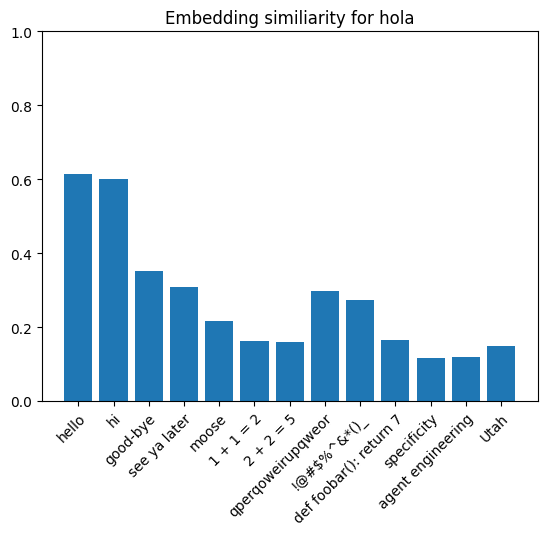

In [15]:
ax = plt.bar(x=range(len(phrases)), height=(query @ embeds.T))
plt.xticks(range(len(phrases)), phrases, rotation=45, ha='right', rotation_mode='anchor')
plt.title('Embedding similiarity for ' + phrase)
plt.ylim([0, 1]);

## Pipeline

In [ ]:
async def embed(content: list[str]) -> np.array:
    response = await client.embeddings.create(
        input=content,
        model='text-embedding-3-small'
    )
    return np.array([emb.embedding for emb in response.data])

In [ ]:
from pathlib import Path

In [ ]:
content_dir = Path('../../../cs301R/gospel-connections/data/text/1-ne/')

In [ ]:
content_verses = []
for content_file in sorted(content_dir.glob('*.txt'), key=lambda f: f.name):
    content_verses += content_file.read_text().splitlines()

In [ ]:
content_verses

In [ ]:
content_embeds = await embed(content_verses)

In [ ]:
content_embeds

In [ ]:
async def get_verses(phrase, threshold = 0.6):
    embedding = await embed([phrase])
    scores = content_embeds @ embedding.T
    return np.array(content_verses)[scores.flatten() > threshold]

In [ ]:
hits = await get_verses('build boat', threshold=0.32)

In [ ]:
for hit in hits:
    print(hit)
    print()